In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.animation as animation
from matplotlib import colors
from utilities import wav2data, spectrogram


In [3]:
%matplotlib notebook

In [4]:
canary = np.array(wav2data('/Users/Alicia/Desktop/SongData/CD2_10x.wav')[0][0])
BDY = np.loadtxt('/Users/Alicia/Desktop/SongData/Porg_BDY.dat')

In [5]:
zebra = np.array(wav2data('/Users/Alicia/Desktop/SongData/Simple.wav')[0][0])

<IPython.core.display.Javascript object>


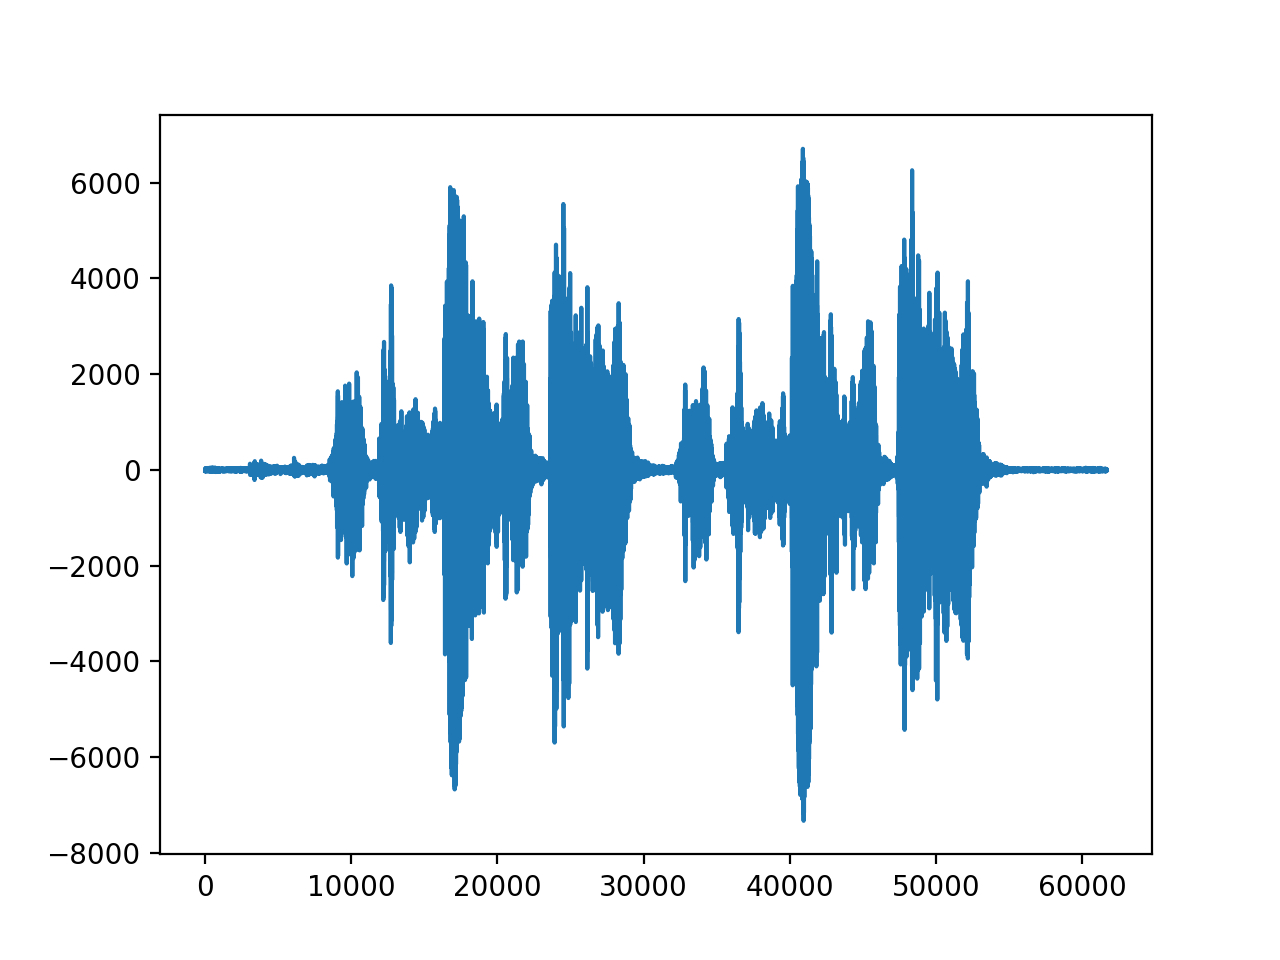

8500

In [6]:
plt.figure()
plt.plot(zebra[:])
+8500
#800:4000 first note 
#4350:8000 second note 
#8000:9000 pure tone
#16800:17500 trigangle 17500:17600 bifurcation? third note
#11000:13000 weird stuff
#13200:14100 long period
#16000:18500 weird stuff with long period in between
#18500:21500 long period

#24600:27500 same as above
#28100:32000 repeat first note: did not find anything noticable
# 32500:34500 third note: triangle, transition

In [8]:
from scipy.interpolate import splprep, splev
from AttractorReconstructUtilities import TimeDelayReconstruct

<IPython.core.display.Javascript object>


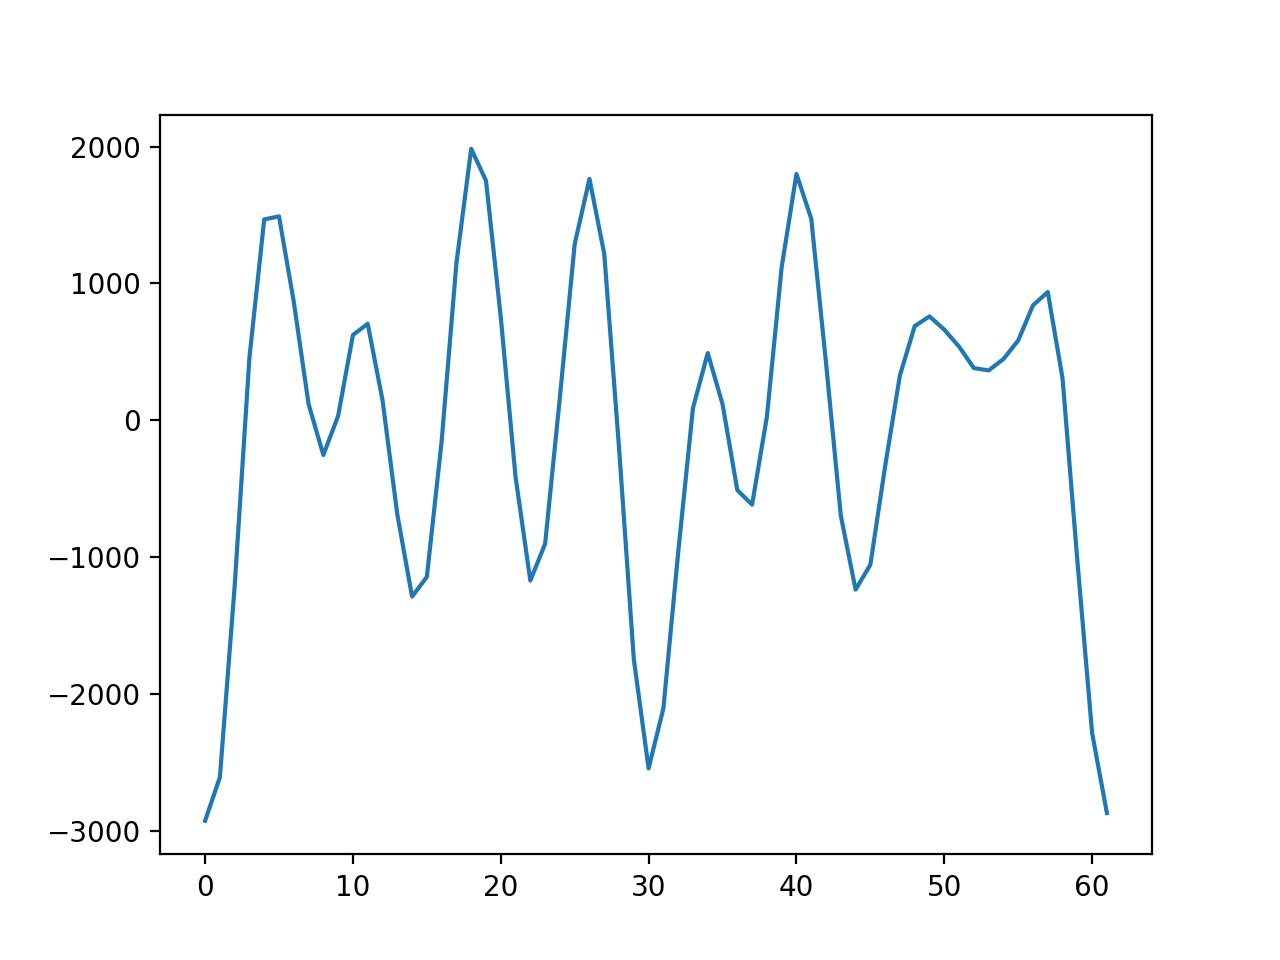

In [9]:
plt.figure()
plt.plot(zebra[27558:27620])

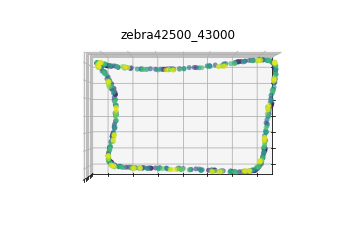

In [25]:
fig = plt.figure()
#TimeSeries3D(zebra[17000:17500], 3, 3, 'zebra17000_17500') #pure tone
#TimeSeries3D(canary1[-3600:-3100], 5, 3, 'canary4600_5100') #pure tone
#TimeSeries3D(zebra[27500:28000], 5, 3, 'zebra27500_28000') #harmonic stack
TimeSeries3D(BDY[42500:43000], 5, 3, 'zebra42500_43000') #harmonic stack
#TimeSeries3D(zebra[15600:15800], 3, 3, 'zebra27500_28000')

<IPython.core.display.Javascript object>


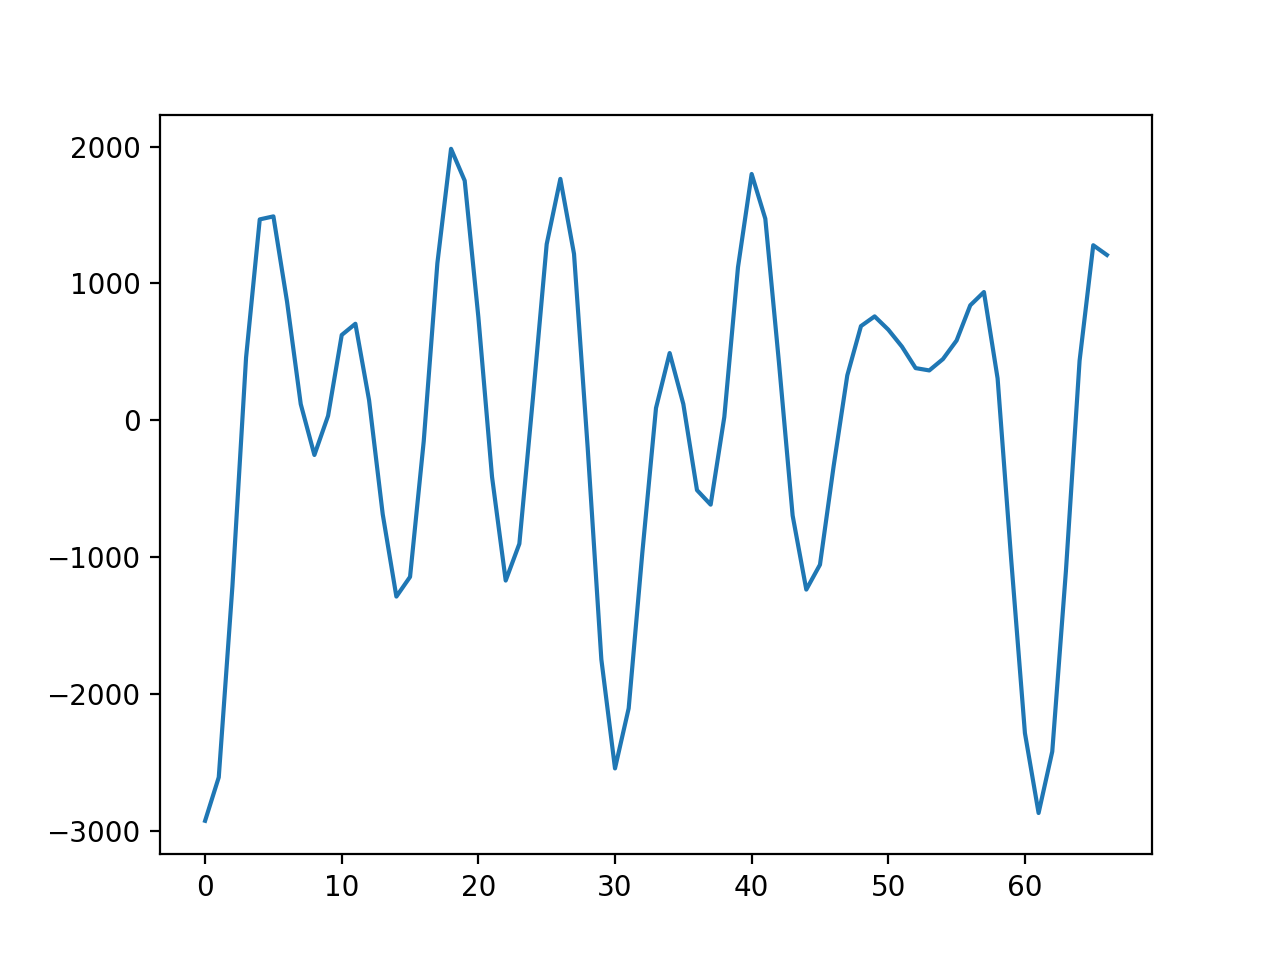

In [48]:
SinglePeriod = zebra[27558:27625]
plt.figure()
plt.plot(SinglePeriod)

<IPython.core.display.Javascript object>


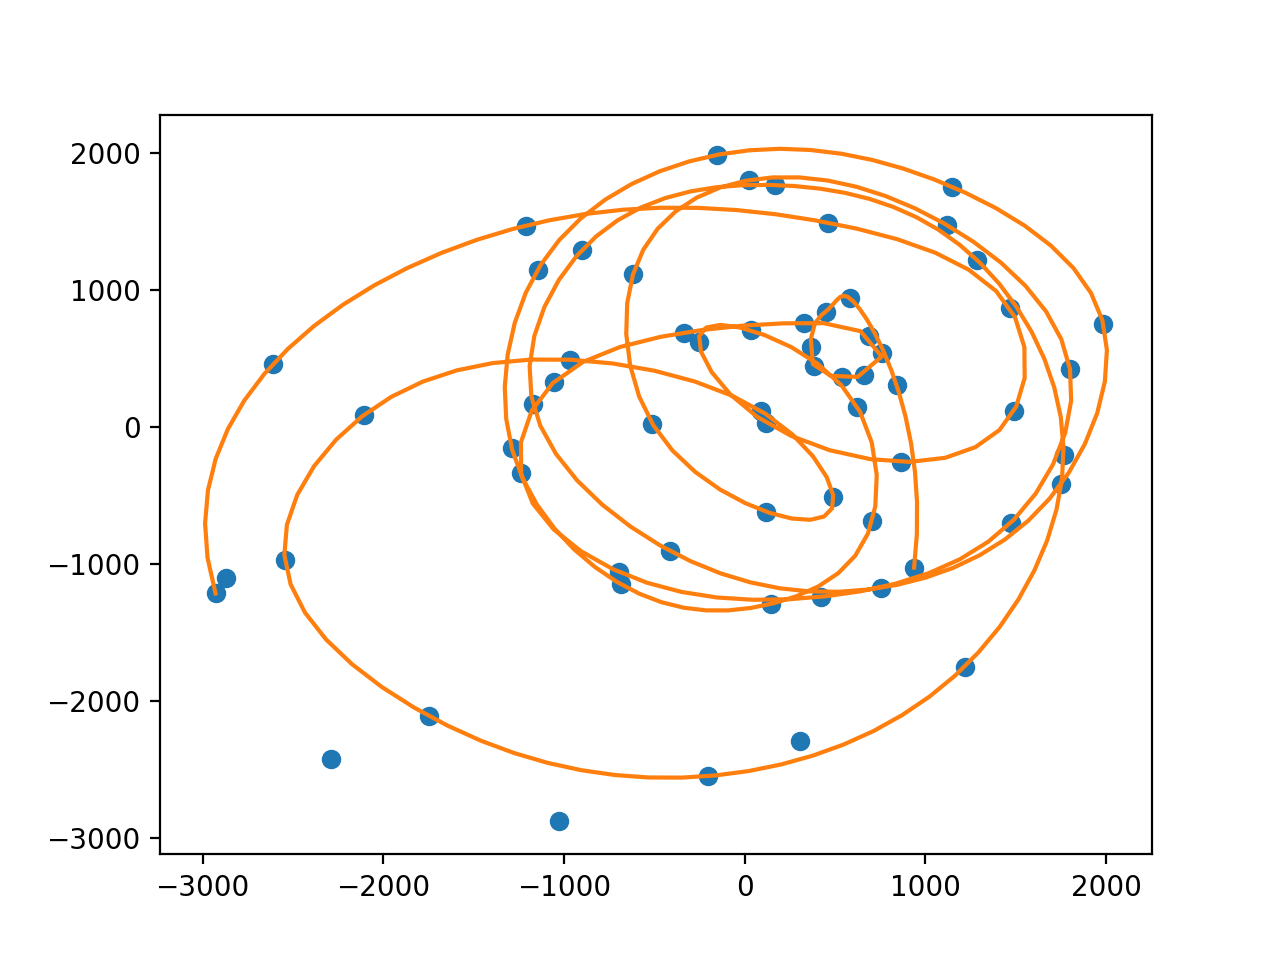

In [52]:
SinglePeriod = zebra[27558:27620]
attractor = TimeDelayReconstruct(SinglePeriod, 2, 3)
tck, u = splprep(attractor.T, u=None, s=0, per=0)
u_new = np.linspace(u.min(), u.max(), 300)
newpoints = splev(u_new, tck, der=0)
newpoints = np.vstack((newpoints[0], newpoints[1], newpoints[2])).T 
plt.figure()
attractor = TimeDelayReconstruct(zebra[27558:27624], 2, 3)
plt.plot(attractor[:,0], attractor[:,1], 'o')
plt.plot(newpoints[:,0], newpoints[:,1], '-')


<IPython.core.display.Javascript object>


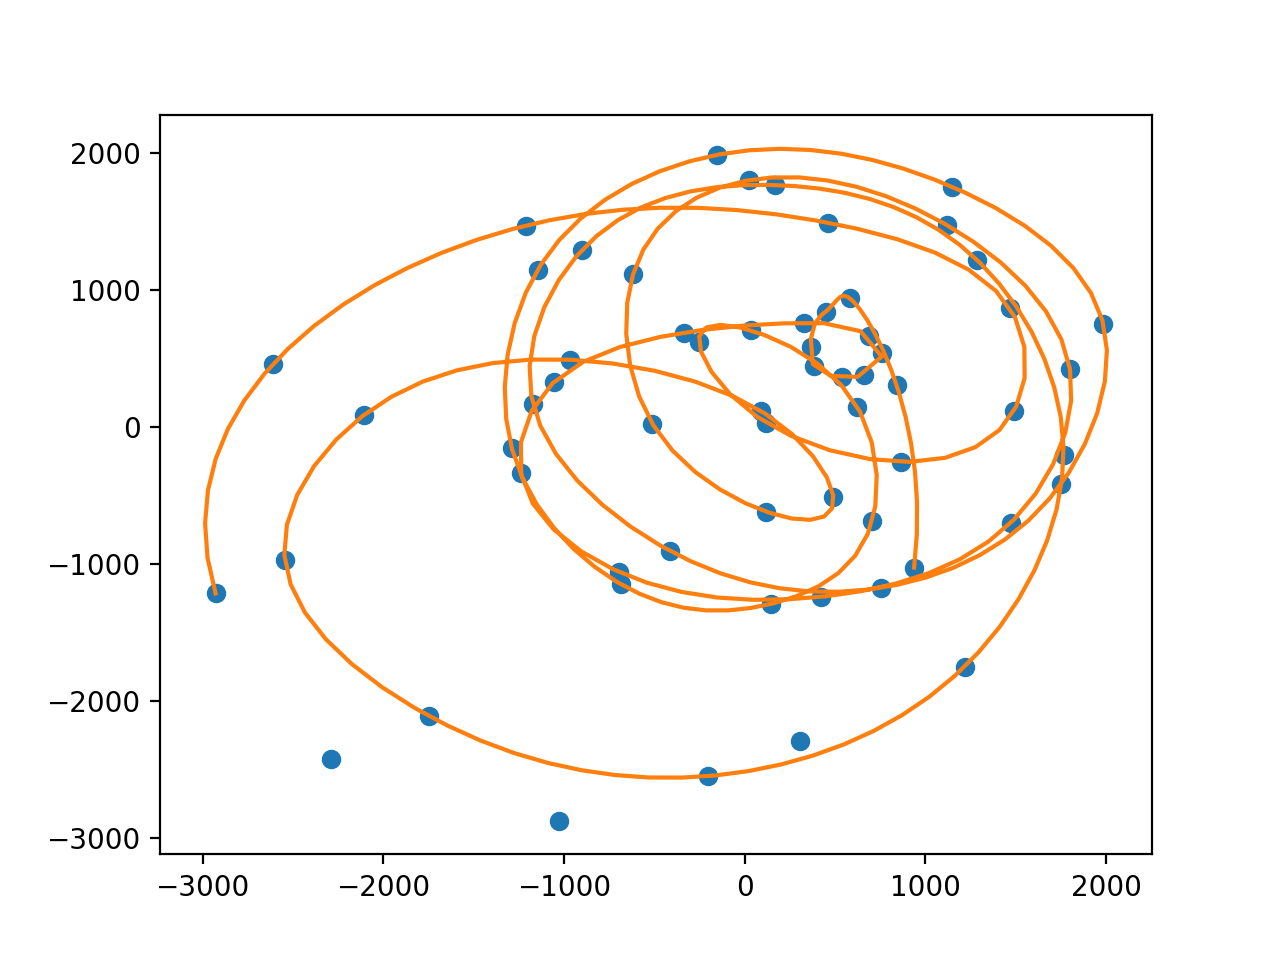

In [51]:
SinglePeriod = zebra[27558:27620]
attractor = TimeDelayReconstruct(SinglePeriod, 2, 3)
tck, u = splprep(attractor.T, u=None, s=0, per=0)
u_new = np.linspace(u.min(), u.max(), 300)
newpoints = splev(u_new, tck, der=0)
newpoints = np.vstack((newpoints[0], newpoints[1], newpoints[2])).T 
plt.figure()
attractor = TimeDelayReconstruct(zebra[27558:27623], 2, 3)
plt.plot(attractor[:,0], attractor[:,1], 'o')
plt.plot(newpoints[:,0], newpoints[:,1], '-')


In [15]:
canary1 = canary[65000:260000]


<IPython.core.display.Javascript object>


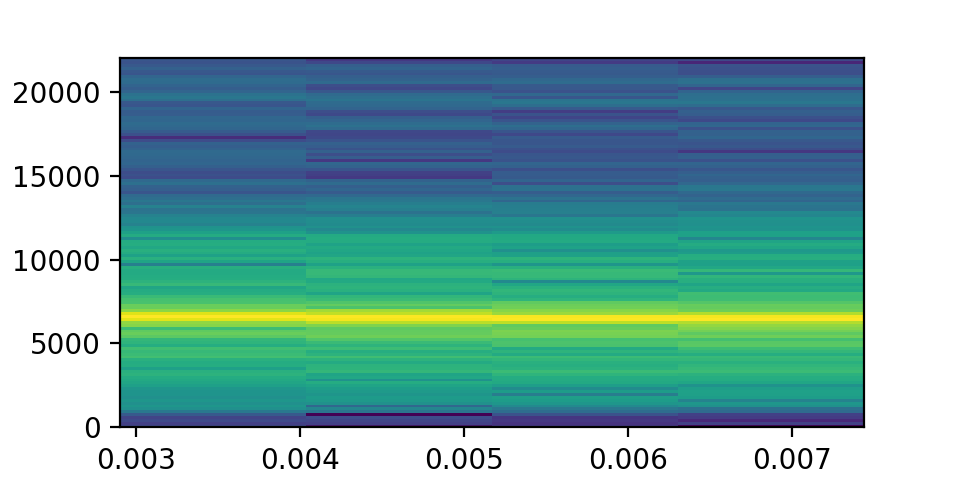

(array([    0.      ,   172.265625,   344.53125 ,   516.796875,
          689.0625  ,   861.328125,  1033.59375 ,  1205.859375,
         1378.125   ,  1550.390625,  1722.65625 ,  1894.921875,
         2067.1875  ,  2239.453125,  2411.71875 ,  2583.984375,
         2756.25    ,  2928.515625,  3100.78125 ,  3273.046875,
         3445.3125  ,  3617.578125,  3789.84375 ,  3962.109375,
         4134.375   ,  4306.640625,  4478.90625 ,  4651.171875,
         4823.4375  ,  4995.703125,  5167.96875 ,  5340.234375,
         5512.5     ,  5684.765625,  5857.03125 ,  6029.296875,
         6201.5625  ,  6373.828125,  6546.09375 ,  6718.359375,
         6890.625   ,  7062.890625,  7235.15625 ,  7407.421875,
         7579.6875  ,  7751.953125,  7924.21875 ,  8096.484375,
         8268.75    ,  8441.015625,  8613.28125 ,  8785.546875,
         8957.8125  ,  9130.078125,  9302.34375 ,  9474.609375,
         9646.875   ,  9819.140625,  9991.40625 , 10163.671875,
        10335.9375  , 10508.203125, 1068

In [16]:
spectrogram(canary1[-3600:-3100], 44100, 256, 50)
#spectrogram(zebra[17000:17500], 44100, 256, 50)
#spectrogram(zebra[27500:28000], 44100, 256, 50)
#spectrogram(BDY[42500:43000], 44100, 256, 50)
#spectrogram(zebra[15400:16000], 44100, 256, 50)

<IPython.core.display.Javascript object>


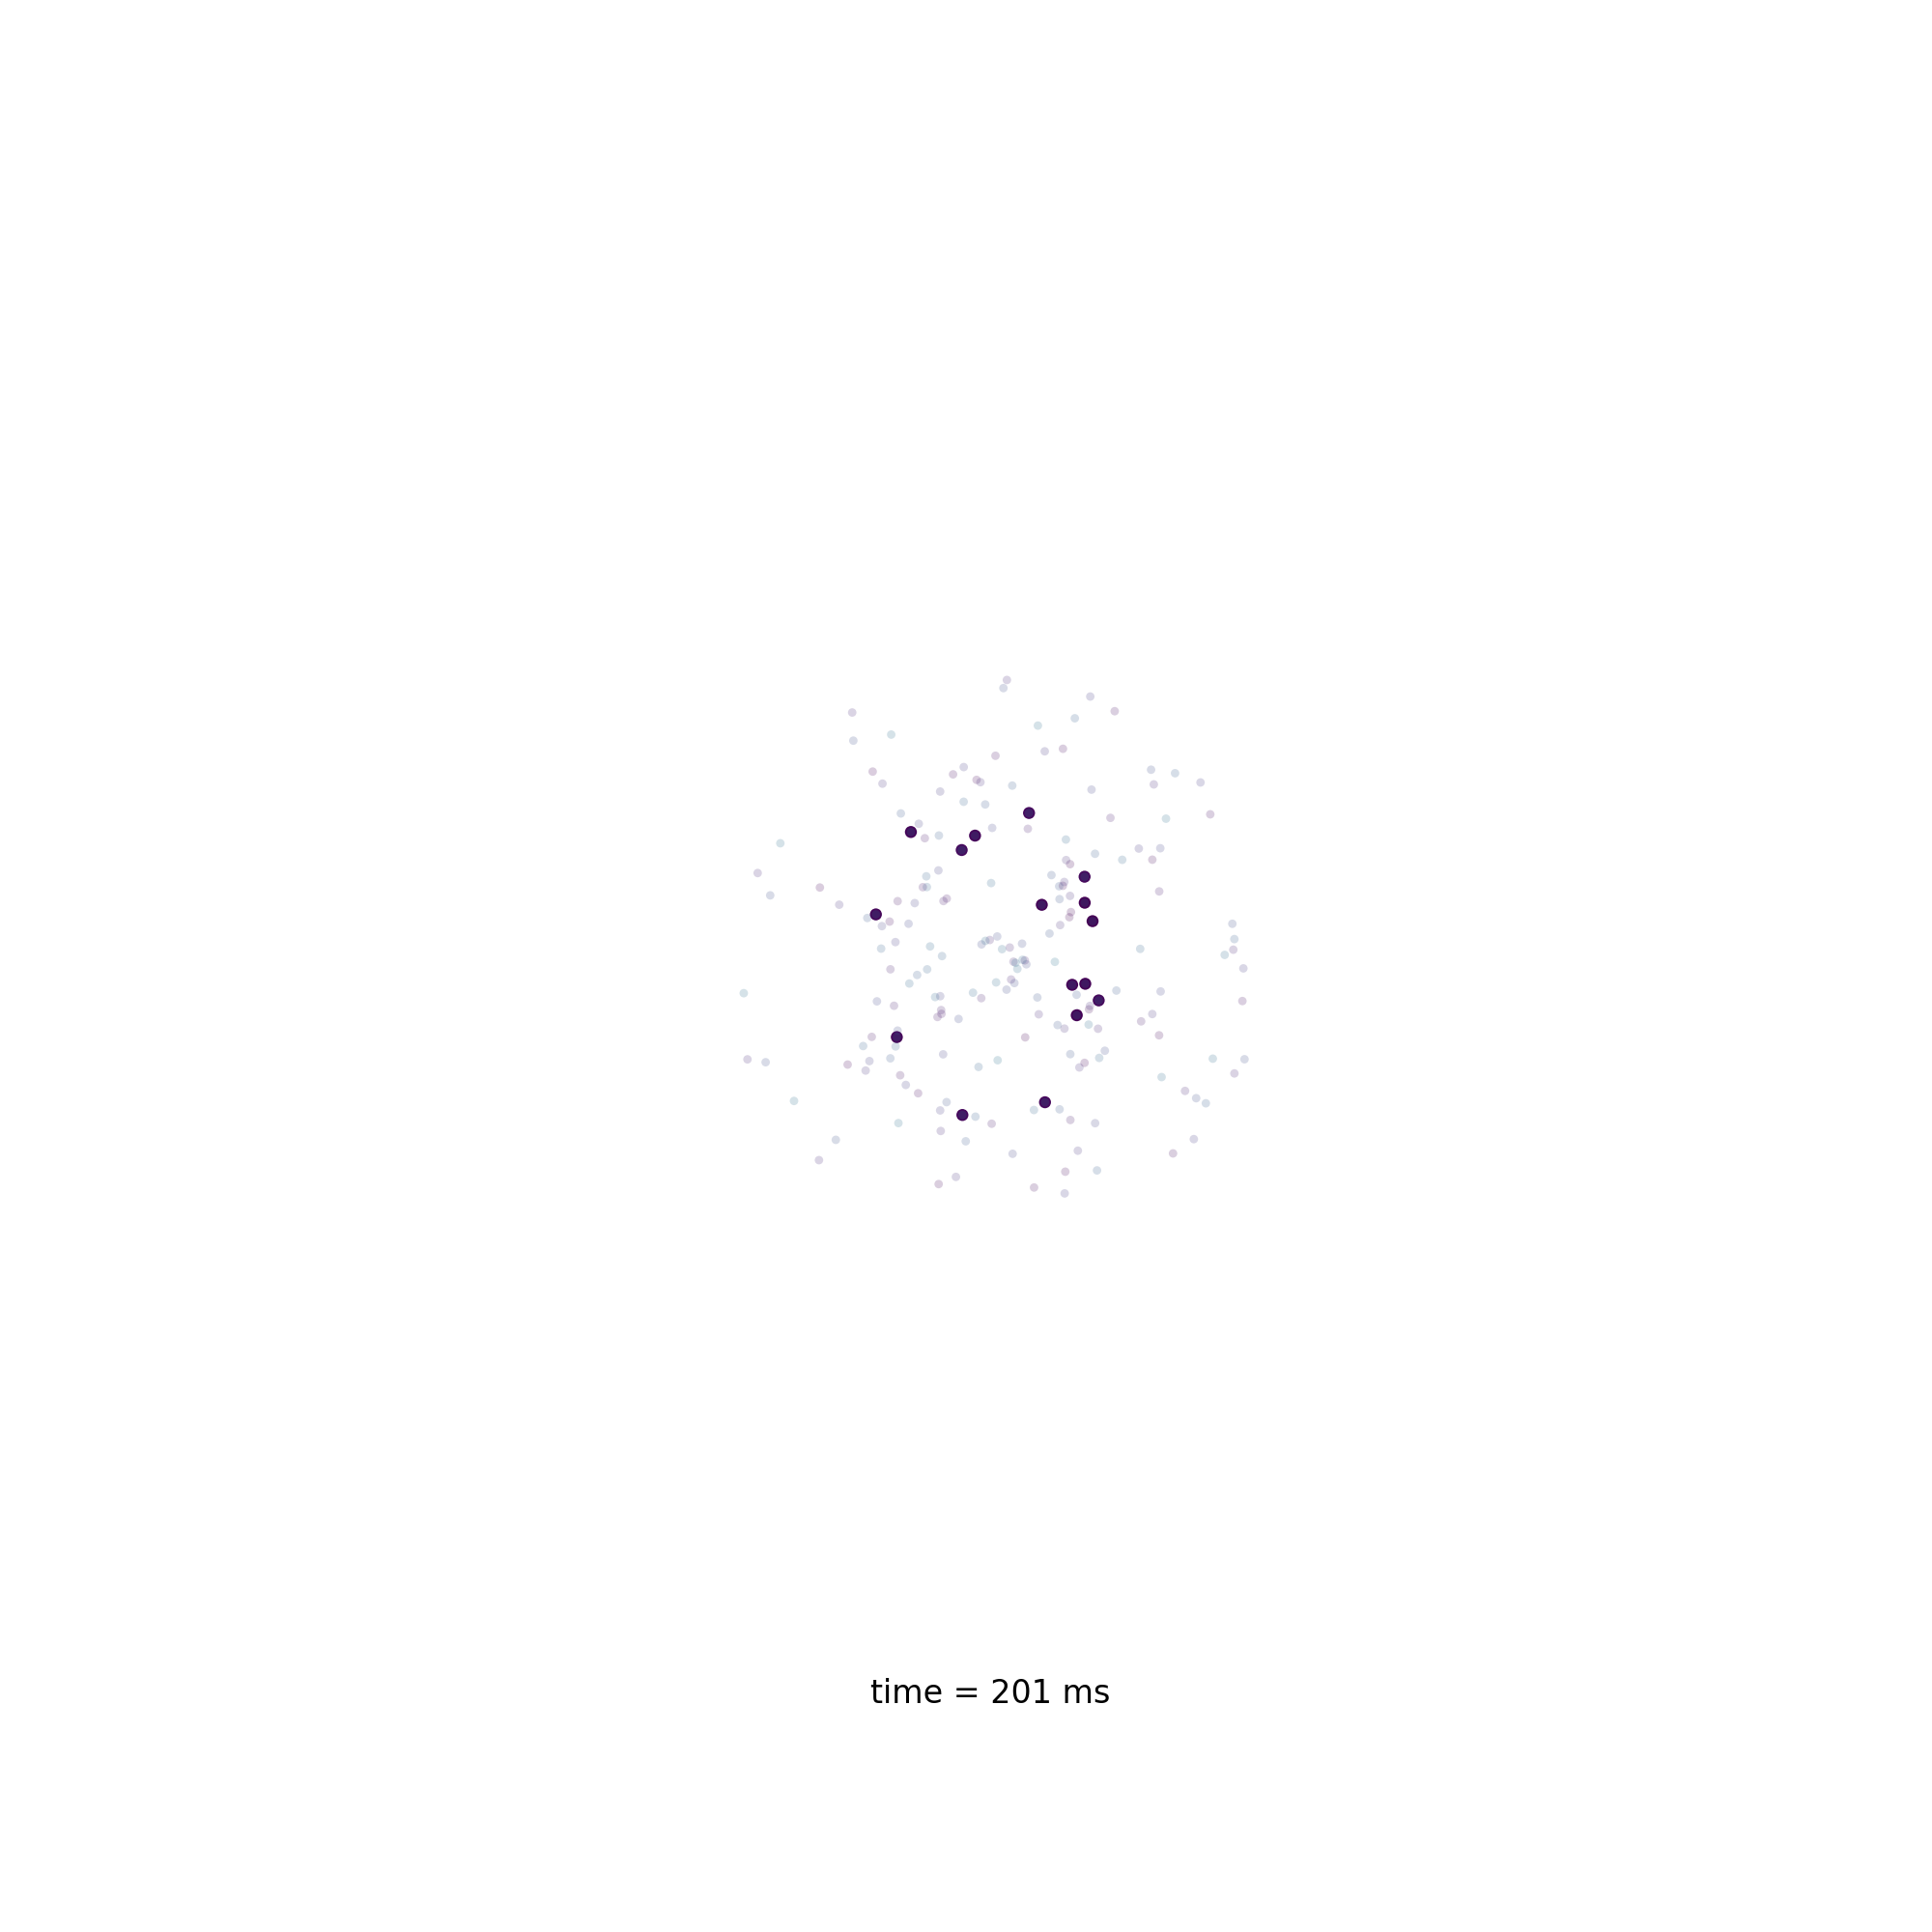

In [126]:
TimeSeries2Ani(zebra[27500:28000], 3, 3, interval = 20, elev=270, azimspeed = 0) 

In [17]:
def TimeSeries3D(TimeSeries, TimeDelayIndex, dimension, Name, axis_limit = None, elev = 90, azim = 0):
    ## Generate a 3D graph of a time series embedded in its 3D phase space
    ## Inputs:
    #       TimeSeries: one dimensional array
    #       TimeDelayIndex: the selected time delay
    
    sample = len(TimeSeries) - (dimension-1)*TimeDelayIndex
    ReconstructedAttractor = np.zeros((sample, dimension)) 
    for i in range(0, sample):
        ReconstructedAttractor[i] = TimeSeries[i:i+ (dimension-1)*TimeDelayIndex+1:TimeDelayIndex]
    pca = PCA(n_components=3)
    #ReconstructedAttractor = pca.fit_transform(ReconstructedAttractor) 
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    data = ReconstructedAttractor.T       
    if axis_limit == None:
        axis_limit = np.amax(abs(ReconstructedAttractor))
    ax.set_xlim3d(-axis_limit, axis_limit)
    ax.set_ylim3d(-axis_limit, axis_limit)
    ax.set_zlim3d(-axis_limit, axis_limit)    
    ax.view_init(elev = elev, azim = azim)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    l = len(TimeSeries)
    ax.set_title('time = %d ms'%i, size = 40)
    
    color_array = np.arange(data.shape[1])
    ax.scatter(data[0], data[1], data[2], '.', lw=0, s = 25, c=color_array, edgecolors=None, alpha=0.65,  cmap=plt.cm.get_cmap('viridis', 100))
    ax.set_title('%s' %Name)

In [18]:
def TimeSeries2Ani(TimeSeries, TimeDelayIndex, dimension, interval, axis_limit = None, colormap = 'viridis', elev = 90, azimspeed = 0.2):
    
    sample = len(TimeSeries) - (dimension-1)*TimeDelayIndex
    ReconstructedAttractor = np.zeros((sample, dimension)) 
    for i in range(0, sample):
        ReconstructedAttractor[i] = TimeSeries[i:i+ (dimension-1)*TimeDelayIndex+1:TimeDelayIndex]
    pca = PCA(n_components=3)
    ReconstructedAttractor = pca.fit_transform(ReconstructedAttractor) 
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.axis('off')
    data = ReconstructedAttractor.T       
    if axis_limit == None:
        axis_limit = np.amax(abs(ReconstructedAttractor))
    ax.set_xlim3d(-axis_limit, axis_limit)
    ax.set_ylim3d(-axis_limit, axis_limit)
    ax.set_zlim3d(-axis_limit, axis_limit)
    
    color_array = np.arange(data.shape[1])
    trajectory = ax.scatter([], [], [], '.', c = [], lw = 0, s = 10, alpha=0.2)
    trajectory.set_cmap("%s" %colormap)
    recent = ax.scatter([], [], [], '.', c = [], lw = 0, s = 20, alpha=1)
    recent.set_cmap("%s" %colormap)
    def update_trajectory(i, data, trajectory, recent):

        trajectory._offsets3d = data[0:3, :i]
        recent._offsets3d = data[0:3, i-16:i]
        
        trajectory.set_cmap("%s" %colormap)
        recent.set_cmap("%s" %colormap)
        trajectory.set_array(color_array)
        recent.set_array(color_array)
        ax.set_title('time = %d ms'%i)
        ax.view_init(elev, azimspeed*i+90)
        return trajectory, recent
    
    # Creating the Animation object
    ani = animation.FuncAnimation(fig, update_trajectory, frames = data.shape[1], fargs=(data, trajectory, recent),  
                                       interval="%s" %interval, blit=True)
    #Writer = animation.writers['ffmpeg']
    #writer = Writer(fps = 1000, metadata=dict(artist='Me'), bitrate=3000)
    #ani.save('ani_BDY.mp4', writer=writer)
   #plt.show()
    return ani